In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline

import statsmodels.api as sm


/Users/brandyn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Create Super Dataset

#2012
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)

#2013
fire_2013 = pd.read_csv('AFD_CY13 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2013.dropna(inplace=True)
fire_2013.index = pd.to_datetime(fire_2013.index)

#2014
fire_2014 = pd.read_csv('AFD_CY14 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2014.dropna(inplace=True)
fire_2014.index = pd.to_datetime(fire_2014.index)

#2015
fire_2015 = pd.read_csv('AFD_CY15 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2015.dropna(inplace=True)
fire_2015.index = pd.to_datetime(fire_2015.index)

#2016
fire_2016 = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2016.dropna(inplace=True)
fire_2016.index = pd.to_datetime(fire_2016.index)

#2017
fire_2017 = pd.read_csv('AFD_CY17 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2017.dropna(inplace=True)
fire_2017.index = pd.to_datetime(fire_2017.index)

final_df = pd.concat([fire_2012, fire_2013, fire_2014, fire_2015, fire_2016, fire_2017])


In [5]:
final_df.to_csv('Full Dataset.csv')

In [3]:
final_df.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,EMS Time Phone Pickup,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,
2012-01-01 00:01:22,12000002,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-2204,ENG66,Code 3,4F,-,01/01/2012 00:01:22,01/01/2012 00:01:58,No,Yes/Left Blank,30228693,97702907,01/01/2012 00:03:29,01/01/2012 00:05:11
2012-01-01 00:11:47,12000008,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2206,ENG22,Code 3,1M,-,01/01/2012 00:11:47,01/01/2012 00:12:36,No,Yes/Left Blank,30222216,97705176,01/01/2012 00:13:07,01/01/2012 00:15:13
2012-01-01 00:16:14,12000012,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2403,ENG24,Code 3,2M,-,01/01/2012 00:16:14,01/01/2012 00:16:40,No,Yes/Left Blank,30172163,97743423,01/01/2012 00:16:51,01/01/2012 00:19:44
2012-01-01 00:21:26,12000015,2012,Not Cancelled,Other,AFD,1st or Only AFD,00-3001,ENG30,Code 3,3F,-,01/01/2012 00:21:26,01/01/2012 00:22:13,No,Yes/Left Blank,30372899,97696675,01/01/2012 00:22:52,01/01/2012 00:26:35
2012-01-01 00:26:09,12000019,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-1902,QNT19,Code 3,4F,-,01/01/2012 00:26:09,01/01/2012 00:26:41,No,Yes/Left Blank,30352693,97776605,01/01/2012 00:27:43,01/01/2012 00:35:34


In [4]:
final_df['Response Area (COA Only)'].value_counts()

00-0101    11356
00-0102     8173
00-2202     5873
00-0701     5455
00-1802     4572
00-1801     4393
00-0501     4206
00-3001     4115
00-1804     4113
00-2402     3910
00-2403     3811
00-1803     3802
00-2301     3694
00-3502     3530
00-2501     3261
00-1101     3196
00-2204     3152
00-1504     3122
00-0601     3079
00-2801     3029
00-2903     2980
00-2005     2977
00-2305     2965
00-0201     2911
00-2304     2906
00-4001     2858
00-1403     2697
00-0301     2675
00-2803     2658
00-0801     2656
           ...  
00-1711       12
00-3208       11
00-1906       11
00-0080       11
00-4208        9
04-2604        9
00-3704        8
00-3702        7
00-1005        6
00-4604        5
00-4106        5
04-4802        4
04-2609        3
00-1004        3
00-4304        3
04-4701        2
04-2304        2
00-3711        2
00-0090        2
04-2605        1
00-4703        1
04-2801        1
04-2608        1
00-0020        1
04-4406        1
04-4103        1
00-3910        1
04-2808       

### Volume Prediction for Response AREA  00-101

In [67]:
#RA__00_101_df = final_df[final_df['Response Area (COA Only)']=='00-0101']
#RA__00_01XX_df = final_df[final_df['Response Area (COA Only)'].str.startswith('00-01')]
#RA_00_4209_df = final_df[final_df['Response Area (COA Only)']=='00-4209']
RA_East_Austin_df = final_df[(final_df['Response Area (COA Only)']=='00-2608') | 
                              (final_df['Response Area (COA Only)']=='00-2607') |
                              (final_df['Response Area (COA Only)']=='00-2606') |
                              (final_df['Response Area (COA Only)']=='00-0504') |
                              (final_df['Response Area (COA Only)']=='00-0504')]

00-2608/2607/2606/0504/0505

In [68]:
RA_East_Austin_df['Response Area (COA Only)'].value_counts()

00-2608    1596
00-2606    1465
00-0504    1019
00-2607     971
Name: Response Area (COA Only), dtype: int64

In [72]:
RA_East_Austin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5051 entries, 2012-01-01 13:46:27 to 2017-11-06 23:54:16
Data columns (total 19 columns):
Master Incident Number           5051 non-null int64
CalendarYear                     5051 non-null int64
Cancellation Status              5051 non-null object
General Dispatched Problem       5051 non-null object
Calltaker Agency (AFD or EMS)    5051 non-null object
Order of AFD Arrival             5051 non-null object
Response Area (COA Only)         5051 non-null object
First Arriving Unit Name         5051 non-null object
Response Status                  5051 non-null object
PriorityDescription              5051 non-null object
EMS Time Phone Pickup            5051 non-null object
Earliest Time Phone Pickup       5051 non-null object
First Unit Assigned              5051 non-null object
Did not Reduce to Code 1         5051 non-null object
Onscene Time Was Correct         5051 non-null object
Latitude                         5051 non-null in

In [48]:
#Check the head of the data
RA_00_4209_df.head(40)

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,EMS Time Phone Pickup,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,
2012-12-19 18:34:10,12115701,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-4209,ENG42,Code 3,1M,-,12/19/2012 18:34:10,12/19/2012 18:37:14,No,Yes/Left Blank,30173111,97615037,12/19/2012 18:38:09,12/19/2012 18:46:09
2013-02-26 16:12:13,13018677,2013,Not Cancelled,Other,AFD,1st or Only AFD,00-4209,ENG42,Code 3,4F,-,02/26/2013 16:12:13,02/26/2013 16:13:00,No,Yes/Left Blank,30167517,97617564,02/26/2013 16:13:59,02/26/2013 16:21:02
2013-03-26 21:11:16,13028162,2013,Not Cancelled,Medical,EMS,1st or Only AFD,00-4209,ENG42,Code 3,1M,-,03/26/2013 21:11:16,03/26/2013 21:14:15,No,Yes/Left Blank,30169362,97619221,03/26/2013 21:15:03,03/26/2013 21:22:55
2013-03-28 14:24:17,13028653,2013,Not Cancelled,Other,AFD,1st or Only AFD,00-4209,ENG42,Code 3,3F,-,03/28/2013 14:24:17,03/28/2013 14:24:59,No,Yes/Left Blank,30174069,97620205,03/28/2013 14:26:11,03/28/2013 14:32:39
2013-04-22 21:11:21,13037374,2013,Left Blank,Medical,EMS,Left Blank,00-4209,ENG42,Left Blank,1M,-,04/22/2013 21:11:21,04/22/2013 21:12:33,No,Yes/Left Blank,30174069,97620205,04/22/2013 21:13:23,04/22/2013 21:22:37
2013-06-11 17:14:03,13053911,2013,Not Cancelled,Medical,EMS,1st or Only AFD,00-4209,ENG42,Code 3,1M,-,06/11/2013 17:14:03,06/11/2013 17:14:16,No,Yes/Left Blank,30171263,97624858,06/11/2013 17:15:15,06/11/2013 17:22:17
2013-07-07 09:13:28,13062827,2013,Cancelled On Arrival,Medical,EMS,1st or Only AFD,00-4209,ENG42,Code 3,1M,-,07/07/2013 09:13:28,07/07/2013 09:18:34,No,Yes/Left Blank,30174449,97629526,07/07/2013 09:19:26,07/07/2013 09:26:59
2013-07-13 14:46:22,13064923,2013,Not Cancelled,Medical,EMS,1st or Only AFD,00-4209,BT42,Code 3,2M,-,07/13/2013 14:46:22,07/13/2013 14:48:05,No,Yes/Left Blank,30174449,97629526,07/13/2013 14:49:23,07/13/2013 14:57:29
2013-08-05 07:33:47,13072551,2013,Cancelled On Arrival,Medical,EMS,1st or Only AFD,00-4209,ENG42,Code 3,3M,-,08/05/2013 07:33:47,08/05/2013 07:38:44,No,Yes/Left Blank,30172892,97609437,08/05/2013 07:39:43,08/05/2013 07:46:59


In [ ]:
RA__00_101_month_df = RA__00_101_df.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
RA__00_101_month_df.columns = ['Count']
#Drop the last column. Its an outlier
RA__00_101_month_df.drop(RA__00_101_month_df.index[-1], inplace=True)

RA__00_101_month_df.plot(figsize=(16,6))

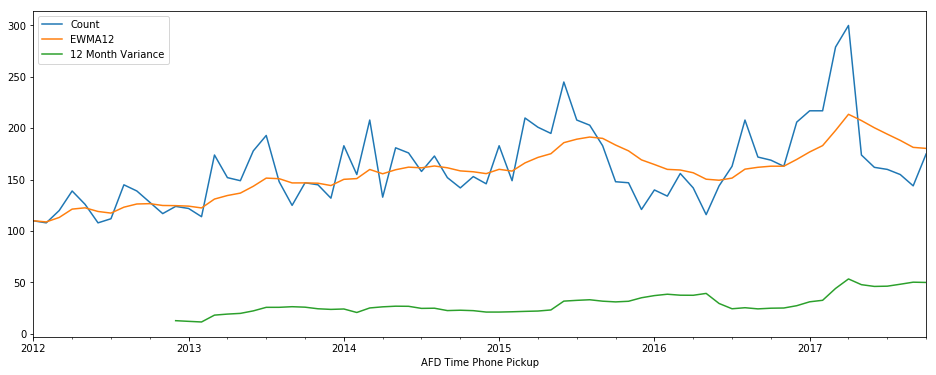

In [16]:
#SMA
RA__00_101_month_df['EWMA12'] = RA__00_101_month_df['Count'].ewm(span=12).mean()

#Variance
RA__00_101_month_df['12 Month Variance'] = RA__00_101_month_df['Count'].rolling(12).std()

RA__00_101_month_df[['Count', 'EWMA12', '12 Month Variance']].plot(figsize=(16,6))

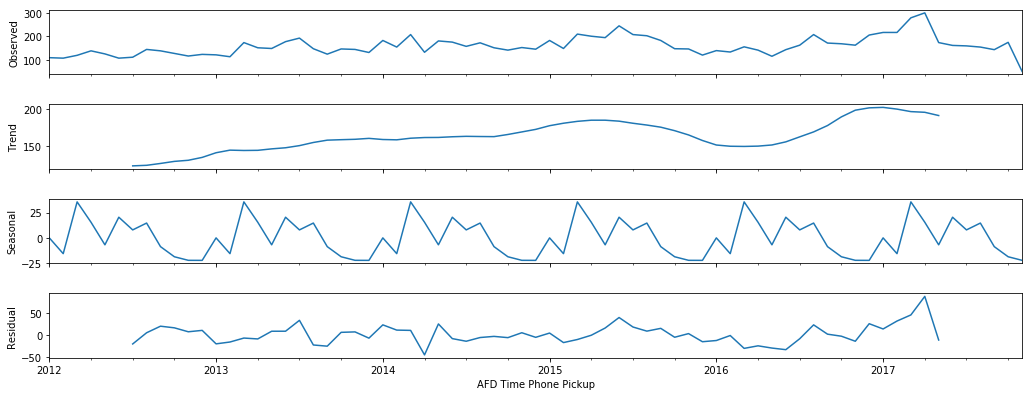

In [14]:
#ETS Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(RA__00_101_month_df['Count'])
fig = result.plot()
fig.set_size_inches(16,6)

#### ARIMA

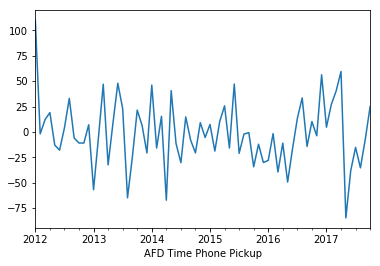

In [18]:
model = sm.tsa.statespace.SARIMAX(RA__00_101_month_df['Count'], order=(1,1,1), seasonal_order=(2,1,1,12))

model_result = model.fit()
model_result.resid.plot()

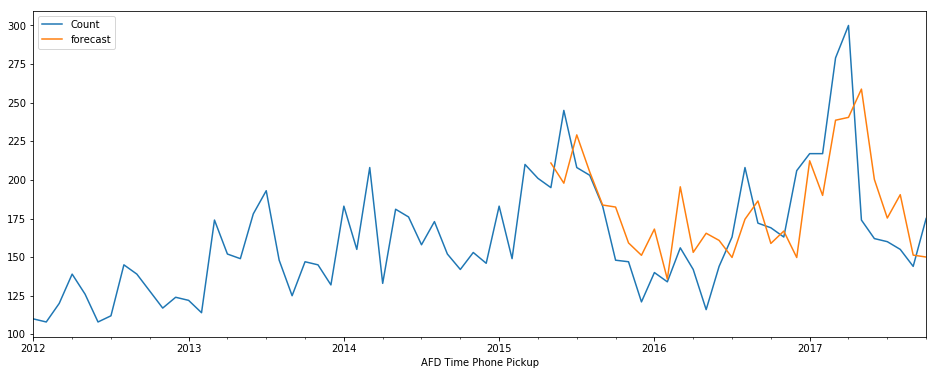

In [19]:
#Forecast Test
RA__00_101_month_df['forecast'] = model_result.predict(start=40, end=70)
RA__00_101_month_df[['Count', 'forecast']].plot(figsize=(16,6))

In [28]:
#Need to add points to the end of the dataset to forecast out
from pandas.tseries.offsets import DateOffset

future_dates = [RA__00_101_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_101_month_df.columns)

future_final_df = pd.concat([RA__00_101_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)
future_final_df[['Count', 'forecast']].plot(figsize=(16,6))

NameError: name 'RA__00_101_month_df' is not defined

# Volume Predictions for Specific Areas

### Volume Prediction for RA 00-01XX (Downtown)

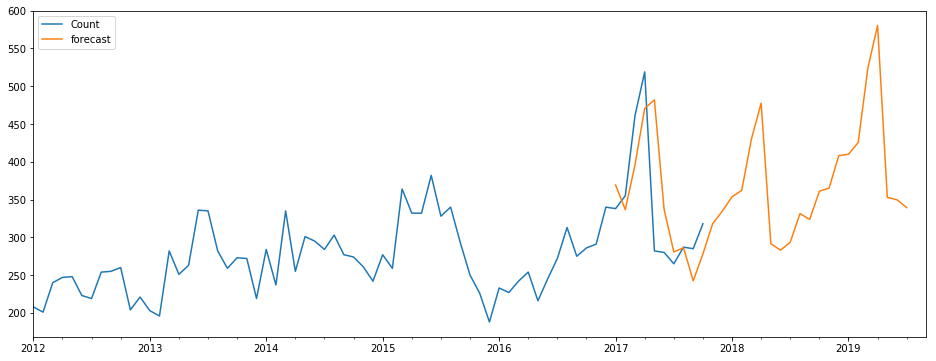

In [42]:
#Create Dataframe
RA__00_01XX_df = final_df[final_df['Response Area (COA Only)'].str.startswith('00-01')]

#Group By Month and create new dataframe
RA__00_01XX_month_df = RA__00_01XX_df.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
RA__00_01XX_month_df.columns = ['Count']
#Drop the last column. Its an outlier
RA__00_01XX_month_df.drop(RA__00_01XX_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_01XX_month_df['Count'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_01XX_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_01XX_month_df.columns)

future_final_df = pd.concat([RA__00_01XX_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Count', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('./Predictions/Volume Prediction for RA 00-01XX.csv')

In [43]:
future_final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2012-01-31 to 2019-09-30
Data columns (total 2 columns):
Count       70 non-null object
forecast    31 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


### Volume Prediction for 00-4209 (Dell Valley)

58


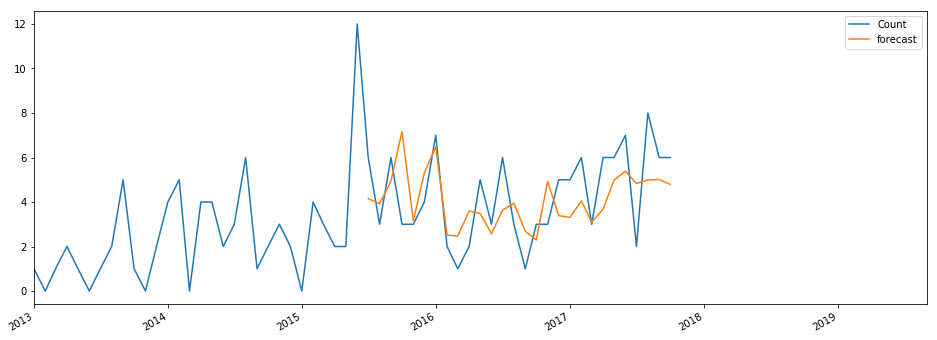

In [41]:
import statsmodels as st
from pandas.tseries.offsets import DateOffset

#Create Dataframe
RA_00_4209_df = final_df[final_df['Response Area (COA Only)']=='00-4209']

#Group By Month and create new dataframe
RA_00_4209_month_df = RA_00_4209_df.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
RA_00_4209_month_df.columns = ['Count']
#Drop the last column. Its an outlier
RA_00_4209_month_df.drop(RA_00_4209_month_df.index[-1], inplace=True)

#RA_East_Austin_month_df['Count'].astype('int64')
print(len(RA_00_4209_month_df))
#Build out ARIMA Model
#model = sm.tsa.statespace.SARIMAX(RA_00_4209_month_df['Count'], order=(1,0,1), seasonal_order=(1,1,1,1))
model = st.tsa.arima_model.ARIMA(RA_00_4209_month_df['Count'].astype(float), (10,0,1))
model_result = model.fit()

#Add Forecast Dates
future_dates_4209 = [RA_00_4209_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df_4209 = pd.DataFrame(index=future_dates_4209, columns=RA_00_4209_month_df.columns)

future_final_df_4209 = pd.concat([RA_00_4209_month_df,future_df_4209])
#Since have 24 more points
future_final_df_4209['forecast'] = model_result.predict(start=30, end=70)


future_final_df_4209[['Count', 'forecast']].plot(figsize=(16,6))
#future_final_df_4209.to_csv('./Predictions/Volume Prediction for RA 00-4209.csv')

In [34]:
future_final_df_4209.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2012-12-31 to 2019-08-30
Data columns (total 2 columns):
Count       58 non-null object
forecast    33 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [35]:
future_final_df_4209.tail(40)
#RA_00_4209_month_df.tail(40)

,Count,forecast
2016-05-31,3,2.575834
2016-06-30,6,3.625935
2016-07-31,3,3.948585
2016-08-31,1,2.689637
2016-09-30,3,2.293002
2016-10-31,3,4.927111
2016-11-30,5,3.390269
2016-12-31,5,3.308464
2017-01-31,6,4.051763
2017-02-28,3,3.096405


### Volume Prediction 00-2608/2607/2606/0504/0505 (East Austin)

In [39]:
#Create Dataframe
RA_East_Austin_df = final_df[(final_df['Response Area (COA Only)']=='00-2608') | 
                              (final_df['Response Area (COA Only)']=='00-2607') |
                              (final_df['Response Area (COA Only)']=='00-2606') |
                              (final_df['Response Area (COA Only)']=='00-0504') |
                              (final_df['Response Area (COA Only)']=='00-0504')]


#Group By Month and create new dataframe
RA_East_Austin_month_df = RA_East_Austin_df.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
RA_East_Austin_month_df.columns = ['Count']

#Drop the last column. Its an outlier
RA_East_Austin_month_df.drop(RA_East_Austin_month_df.index[-1], inplace=True)

RA_East_Austin_month_df['Count'].astype('int64')

#Build out ARIMA Model
model_ea = sm.tsa.statespace.SARIMAX(RA_East_Austin_month_df['Count'], order=(0,1,1), seasonal_order=(1,1,1,12))
model_ea_result = model.fit()

#Add Forecast Dates
future_dates = [RA_East_Austin_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA_East_Austin_month_df.columns)

future_final_df = pd.concat([RA_East_Austin_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_ea_result.predict(start=60, end=94)


future_final_df[['Count', 'forecast']].plot(figsize=(16,6))
#future_final_df.to_csv('./Predictions/Volume Prediction for East Austin.csv')

ValueError: non-invertible starting MA parameters found with `enforce_invertibility` set to True.

### Volume 00-2405/2404/2403 (Goodnight)

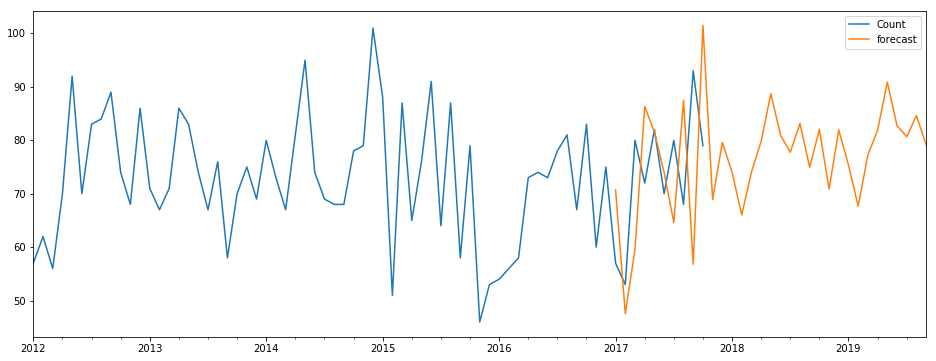

In [40]:
#Create Dataframe
RA_Goodnight_df = final_df[(final_df['Response Area (COA Only)']=='00-2405') | 
                              (final_df['Response Area (COA Only)']=='00-2404') |
                              (final_df['Response Area (COA Only)']=='00-2403')]

#Group By Month and create new dataframe
RA_Goodnight_month_df = RA_Goodnight_df.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
RA_Goodnight_month_df.columns = ['Count']
#Drop the last column. Its an outlier
RA_Goodnight_month_df.drop(RA_Goodnight_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA_Goodnight_month_df['Count'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA_Goodnight_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA_Goodnight_month_df.columns)

future_final_df = pd.concat([RA_Goodnight_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=94)


future_final_df[['Count', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('./Predictions/Volume Prediction for Goodnight.csv')